# Northwind Database Machine Learning Project

The Northwind database is a sample database that was originally created by Microsoft and used as the basis for their tutorials in a variety of database products for decades. The Northwind database contains the sales data for a fictitious company called “Northwind Traders,” which imports and exports specialty foods from around the world. The Northwind database is an excellent tutorial schema for a small-business ERP, with customers, orders, inventory, purchasing, suppliers, shipping, employees, and single-entry accounting.

In [1]:
# import necessory libraraies
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np 
import seaborn as sns 
from sqlalchemy import create_engine
from dotenv import load_dotenv

In [2]:
# Path to the dataset
ROOT_DIR = Path.cwd().parents[2]
DATA_DIR = ROOT_DIR / "data" / "files" 
ENV_FILE = ROOT_DIR / "env" / ".env"  
NORTHWIND_CSV = DATA_DIR / "northwind_data.csv"

In [3]:
load_dotenv(ENV_FILE)
DB_CREDENTIALS = os.getenv("DB_STRING")

In [4]:
DB_ENGINE = create_engine(DB_CREDENTIALS)


In [5]:
SQL_QUERY = """ 
SET SCHEMA 'northwind';
-- merge all tables
SELECT
    -- orders
    ord.orderdate,ord.requireddate, ord.shippeddate, ord.shipvia, ord.freight,
    ord.shipname, ord.shipaddress, ord.shipcity, ord.shipregion,
    ord.shippostalcode, ord.shipcountry,
    -- order details
    odd.unitprice AS order_details_unitprice,
    odd.quantity AS order_details_quantity,
    odd.discount AS order_details_discount,
    -- customers
    cus.companyname AS customers_companyname, 
    cus.contactname AS customers_contactname, 
    cus.contacttitle AS customers_contacttitle, 
    cus.address AS customers_address, 
    cus.city AS customers_city,
    cus.region AS customers_region, 
    cus.postalcode AS customers_postalcode, 
    cus.country AS customers_country, 
    cus.phone AS customers_phone, 
    cus.fax AS customers_fax,
    -- products
    pro.productname,
    pro.quantityperunit AS products_quantity_per_unit,
    pro.unitprice AS products_unitprice,
    pro.unitsinstock AS products_units_in_stock,
    pro.unitsonorder AS products_units_on_order,
    pro.reorderlevel AS products_reorder_level,
    pro.discontinued AS products_discontinued,
    -- categories
    cat.categoryname,
    cat.description AS categories_description,
    cat.picture AS categories_picture,
    -- employees
    emp.lastname AS employees_lastname,
    emp.firstname AS employees_firstname,
    emp.title AS employees_title,
    emp.titleofcourtesy AS employees_title_of_courtesy,
    emp.birthdate AS employees_birthdate,
    emp.hiredate AS employees_hiredate,
    emp.address AS employees_address,
    emp.city AS employees_city, emp.region AS employees_region,
    emp.postalcode AS employees_postalcode,
    emp.country AS employees_country,
    emp.homephone AS employees_homephone,
    emp.extension AS employees_extension,
    emp.photo AS employees_photo,
    emp.notes AS employees_notes,
    emp.reportsto AS employees_reportsto,
    emp.photopath AS employees_photo_path,
    -- employee_territories
    empt.territoryid AS employee_territories_id,
    -- suppliers
    sup.companyname AS suppliers_company_name,
    sup.contactname AS suppliers_contact_name,
    sup.contacttitle AS suppliers_contact_title,
    sup.address AS suppliers_address,
    sup.city AS suppliers_city, sup.region AS suppliers_region,
    sup.postalcode AS suppliers_postalcode,
    sup.country AS suppliers_country,
    sup.phone AS suppliers_phone, sup.fax As suppliers_fax,
    sup.homepage AS suppliers_homepage,
    -- shippers: no relationship found in orders
    -- shi.companyname AS shippers_company_name,
    -- shi.phone AS shippers_phone,
    -- territories
    ter.territorydescription AS territories_description,
    -- regions
    reg.regiondescription AS region_description
FROM orders ord

LEFT JOIN order_details odd ON ord.orderid = odd.orderid
LEFT JOIN customers cus ON ord.customerid = cus.customerid
LEFT JOIN products pro ON odd.productid = pro.productid
LEFT JOIN categories cat ON pro.productid = cat.categoryid
LEFT JOIN employees emp ON ord.employeeid = emp.employeeid
LEFT JOIN employee_territories empt ON emp.employeeid = empt.employeeid
LEFT JOIN suppliers sup ON pro.supplierid = sup.supplierid
-- LEFT JOIN shippers shi ON ord.shipperid = shi.shipperid
LEFT JOIN territories ter ON empt.territoryid = ter.territoryid
LEFT JOIN regions reg ON ter.regionid = reg.regionid;
"""

In [ ]:
# northwind_dataset = pd.read_sql(SQL_QUERY, DB_ENGINE)
# northwind_dataset.to_csv(NORTHWIND_CSV, index=False)

In [5]:
northwind_df = pd.read_csv(NORTHWIND_CSV)
northwind_df.head()

,orderdate,requireddate,shippeddate,shipvia,freight,shipname,shipaddress,shipcity,shipregion,shippostalcode,...,suppliers_address,suppliers_city,suppliers_region,suppliers_postalcode,suppliers_country,suppliers_phone,suppliers_fax,suppliers_homepage,territories_description,region_description
0,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,Fairport,Eastern
1,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,Mellvile,Eastern
2,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,NewYork,Eastern
3,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,NewYork,Eastern
4,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,Edison,Eastern


In [6]:
northwind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   orderdate                    10129 non-null  object 
 1   requireddate                 10129 non-null  object 
 2   shippeddate                  9840 non-null   object 
 3   shipvia                      10129 non-null  int64  
 4   freight                      10129 non-null  float64
 5   shipname                     10129 non-null  object 
 6   shipaddress                  10129 non-null  object 
 7   shipcity                     10129 non-null  object 
 8   shipregion                   3864 non-null   object 
 9   shippostalcode               9821 non-null   object 
 10  shipcountry                  10129 non-null  object 
 11  order_details_unitprice      10129 non-null  float64
 12  order_details_quantity       10129 non-null  int64  
 13  order_details_di

In [7]:
northwind_df.describe()

,shipvia,freight,order_details_unitprice,order_details_quantity,order_details_discount,products_unitprice,products_units_in_stock,products_units_on_order,products_reorder_level,employees_extension,employees_reportsto,employee_territories_id
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,8442.000000,10129.000000
mean,1.997236,101.391841,26.519361,24.343963,0.058074,28.177478,39.567085,8.161714,11.786455,2686.938888,3.190121,39445.883503
std,0.777086,142.631067,30.607125,19.410689,0.084065,32.381825,36.098826,19.840824,10.761393,1778.407490,1.467730,32149.598006
min,1.000000,0.020000,2.000000,1.000000,0.000000,2.500000,0.000000,0.000000,0.000000,428.000000,2.000000,1581.000000
25%,1.000000,19.640000,12.000000,10.000000,0.000000,12.500000,17.000000,0.000000,0.000000,465.000000,2.000000,10038.000000
50%,2.000000,55.120000,18.400000,20.000000,0.000000,19.450000,25.000000,0.000000,10.000000,3355.000000,2.000000,31406.000000
75%,3.000000,123.830000,32.800000,30.000000,0.100000,34.000000,57.000000,0.000000,20.000000,3457.000000,5.000000,60179.000000
max,3.000000,1007.640000,263.500000,130.000000,0.250000,263.500000,125.000000,100.000000,30.000000,5467.000000,5.000000,98104.000000


In [8]:
northwind_df.shape

(10129, 65)

In [9]:
northwind_df.columns.tolist()

['orderdate',
 'requireddate',
 'shippeddate',
 'shipvia',
 'freight',
 'shipname',
 'shipaddress',
 'shipcity',
 'shipregion',
 'shippostalcode',
 'shipcountry',
 'order_details_unitprice',
 'order_details_quantity',
 'order_details_discount',
 'customers_companyname',
 'customers_contactname',
 'customers_contacttitle',
 'customers_address',
 'customers_city',
 'customers_region',
 'customers_postalcode',
 'customers_country',
 'customers_phone',
 'customers_fax',
 'productname',
 'products_quantity_per_unit',
 'products_unitprice',
 'products_units_in_stock',
 'products_units_on_order',
 'products_reorder_level',
 'products_discontinued',
 'categoryname',
 'categories_description',
 'categories_picture',
 'employees_lastname',
 'employees_firstname',
 'employees_title',
 'employees_title_of_courtesy',
 'employees_birthdate',
 'employees_hiredate',
 'employees_address',
 'employees_city',
 'employees_region',
 'employees_postalcode',
 'employees_country',
 'employees_homephone',
 'em

In [10]:
# Check data types and missing values

data_info = pd.DataFrame({
    'Data Type': northwind_df.dtypes,
    'Missing Values': northwind_df.isnull().sum(),
    'Missing %': (northwind_df.isnull().sum() / len(northwind_df) * 100).round(2),
    'Unique Values': northwind_df.nunique()
})
print(data_info)

                        Data Type  Missing Values  Missing %  Unique Values
orderdate                  object               0       0.00            480
requireddate               object               0       0.00            454
shippeddate                object             289       2.85            387
shipvia                     int64               0       0.00              3
freight                   float64               0       0.00            799
...                           ...             ...        ...            ...
suppliers_phone            object               0       0.00             29
suppliers_fax              object            5715      56.42             13
suppliers_homepage         object            7667      75.69              5
territories_description    object               0       0.00             48
region_description         object               0       0.00              4

[65 rows x 4 columns]


1. Group customers into categories to understand the best customers.
2. Business Question: customers to focud for maximum profit.
3. customer segmentation (Clustering)

In [11]:
# Customer Summary Dataset

customer_summary = northwind_df.groupby('customers_companyname')
customer_summary = customer_summary.agg({
    'orderdate': ['min', 'max', 'count'],
    'freight': 'sum',
    'order_details_unitprice': 'mean',
    'order_details_quantity': 'sum'
})
customer_summary.head()

orderdate                    freight  \
                                           min         max count      sum   
customers_companyname                                                       
Alfreds Futterkiste                 1997-08-25  1998-04-09    40  1218.08   
Ana Trujillo Emparedados y helados  1996-09-18  1998-03-04    48  1086.00   
Antonio Moreno Taquería             1996-11-27  1998-01-28    90  4687.00   
Around the Horn                     1996-11-15  1998-04-10   111  5227.13   
B's Beverages                       1996-08-26  1998-04-14   108  2346.99   

                                   order_details_unitprice  \
                                                      mean   
customers_companyname                                        
Alfreds Futterkiste                              25.247500   
Ana Trujillo Emparedados y helados               21.541667   
Antonio Moreno Taquería                          24.031778   
Around the Horn                                  20.420270   
B's Beverages                                    22.002778   

                                   order_details_quantity  
                                                      sum  
customers_companyname                                      
Alfreds Futterkiste                                   623  
Ana Trujillo Emparedados y helados                    259  
Antonio Moreno Taquería                              1958  
Around the Horn                                      2568  
B's Beverages                                        1489

In [12]:
# Calculate the value of each order line
# Order line value = unit price * quantity * (1- discount)
northwind_df['order_line_value'] = (
    northwind_df['order_details_unitprice'] *
    northwind_df['order_details_quantity'] *
    (1 - northwind_df['order_details_discount'])
)
northwind_df.head()

,orderdate,requireddate,shippeddate,shipvia,freight,shipname,shipaddress,shipcity,shipregion,shippostalcode,...,suppliers_city,suppliers_region,suppliers_postalcode,suppliers_country,suppliers_phone,suppliers_fax,suppliers_homepage,territories_description,region_description,order_line_value
0,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,Fairport,Eastern,168.0
1,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,Mellvile,Eastern,168.0
2,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,NewYork,Eastern,168.0
3,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,NewYork,Eastern,168.0
4,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,Edison,Eastern,168.0


In [13]:
northwind_df['order_line_value'].iloc[0]

np.float64(168.0)

In [14]:
# Group by customer to create customer-level features
customer_summary = northwind_df.groupby('customers_companyname').agg({
    'order_line_value': ['sum', 'mean', 'count'],  # Total spent, average order value, number of orders
    'order_details_quantity': 'sum',  # Total items purchased
    'order_details_discount': 'mean',  # Average discount received
    'productname': 'nunique',  # How many different products they buy
    'orderdate': ['min', 'max']  # First and last order dates
}).reset_index()

In [15]:
# Flatten the column names
customer_summary.columns = [
    'customer_name',
    'total_spent',
    'avg_order_value',
    'order_count',
    'total_items',
    'avg_discount',
    'unique_products',
    'first_order',
    'last_order'
]
customer_summary.head()

,customer_name,total_spent,avg_order_value,order_count,total_items,avg_discount,unique_products,first_order,last_order
0,Alfreds Futterkiste,14064.500,351.612500,40,623,0.111250,11,1997-08-25,1998-04-09
1,Ana Trujillo Emparedados y helados,5630.200,117.295833,48,259,0.000000,10,1996-09-18,1998-03-04
2,Antonio Moreno Taquería,41514.705,461.274500,90,1958,0.053333,15,1996-11-27,1998-01-28
3,Around the Horn,60560.250,545.587838,111,2568,0.020270,24,1996-11-15,1998-04-10
4,B's Beverages,28299.900,262.036111,108,1489,0.000000,19,1996-08-26,1998-04-14


In [16]:
# Explore customer data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100


In [17]:
print(f"We have {len(customer_summary)} customers to analyze")


We have 89 customers to analyze


### EDA Visualising One by One

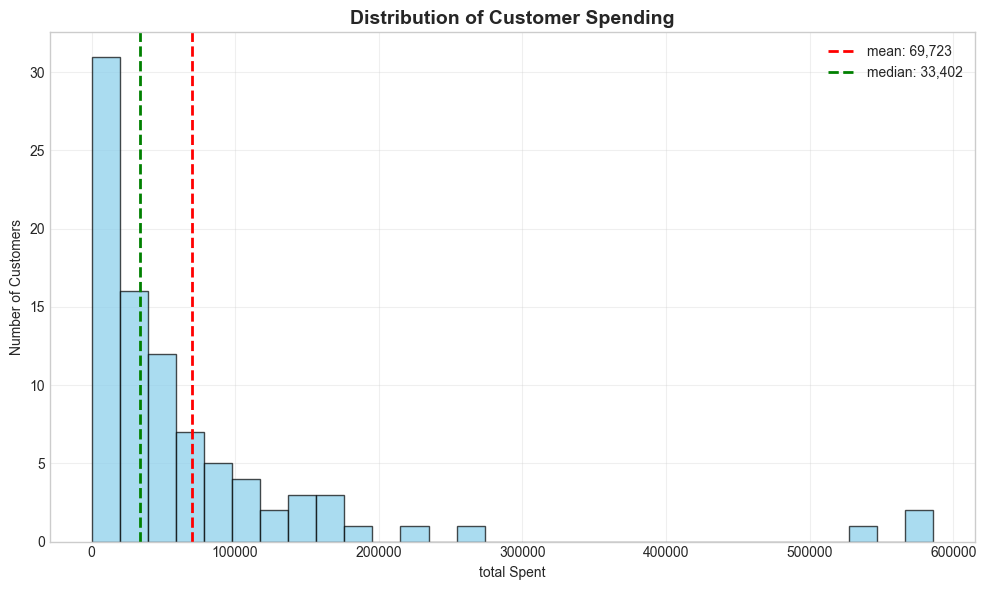

In [18]:
# Visualization one by one

# 1. Distribution of total spending
plt.figure(figsize=(10, 6))
plt.hist(customer_summary['total_spent'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('total Spent')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Spending', fontweight='bold', fontsize=14)
# plt.show()

# Add mean line
mean_spent = customer_summary['total_spent'].mean()
plt.axvline(mean_spent, color='red', linestyle='--', linewidth=2, label=f'mean: {mean_spent:,.0f}')
# plt.legend()

# Add median line
median_spent = customer_summary['total_spent'].median()
plt.axvline(median_spent, color='green', linestyle='--', linewidth=2, label=f'median: {median_spent:,.0f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

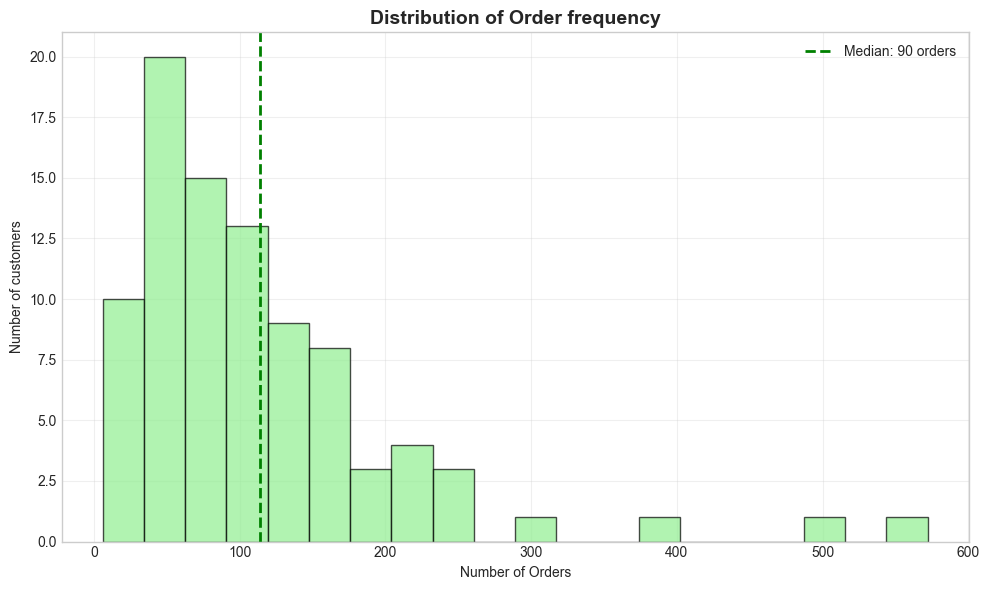

In [19]:
# 2. Order frequency distribution

plt.figure(figsize=(10, 6))
plt.hist(customer_summary['order_count'], bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
plt.xlabel('Number of Orders')
plt.ylabel('Number of customers')
plt.title('Distribution of Order frequency', fontweight='bold', fontsize=14)
# plt.show()

# Add statistics
mean_orders = customer_summary['order_count'].mean()
median_orders = customer_summary['order_count'].median()
plt.axvline(mean_orders, color='green', linestyle='--', linewidth=2, label=f'Median: {median_orders:.0f} orders')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


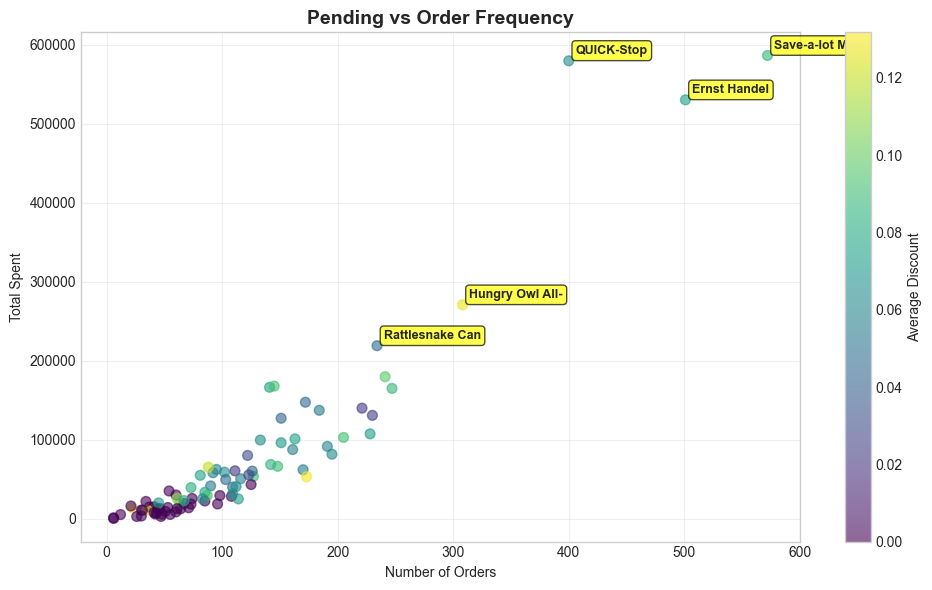

In [20]:
# 3. Scatter plot: Orders vs Spending

plt.figure(figsize=(10, 6))
scatter = plt.scatter(customer_summary['order_count'], customer_summary['total_spent'],
            alpha=0.6, s=50, c=customer_summary['avg_discount'], cmap='viridis')
plt.xlabel('Number of Orders')
plt.ylabel('Total Spent')
plt.title('Pending vs Order Frequency', fontweight='bold', fontsize=14)
plt.colorbar(scatter,label='Average Discount')

# Highlight top 5 customers
top_5 = customer_summary.nlargest(5, 'total_spent')
for idx, row in top_5.iterrows():
    plt.annotate(row['customer_name'][:15], # show first 15 characters
               (row['order_count'], row['total_spent']),
               xytext=(5, 5), textcoords='offset points', fontsize=9, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))
    
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

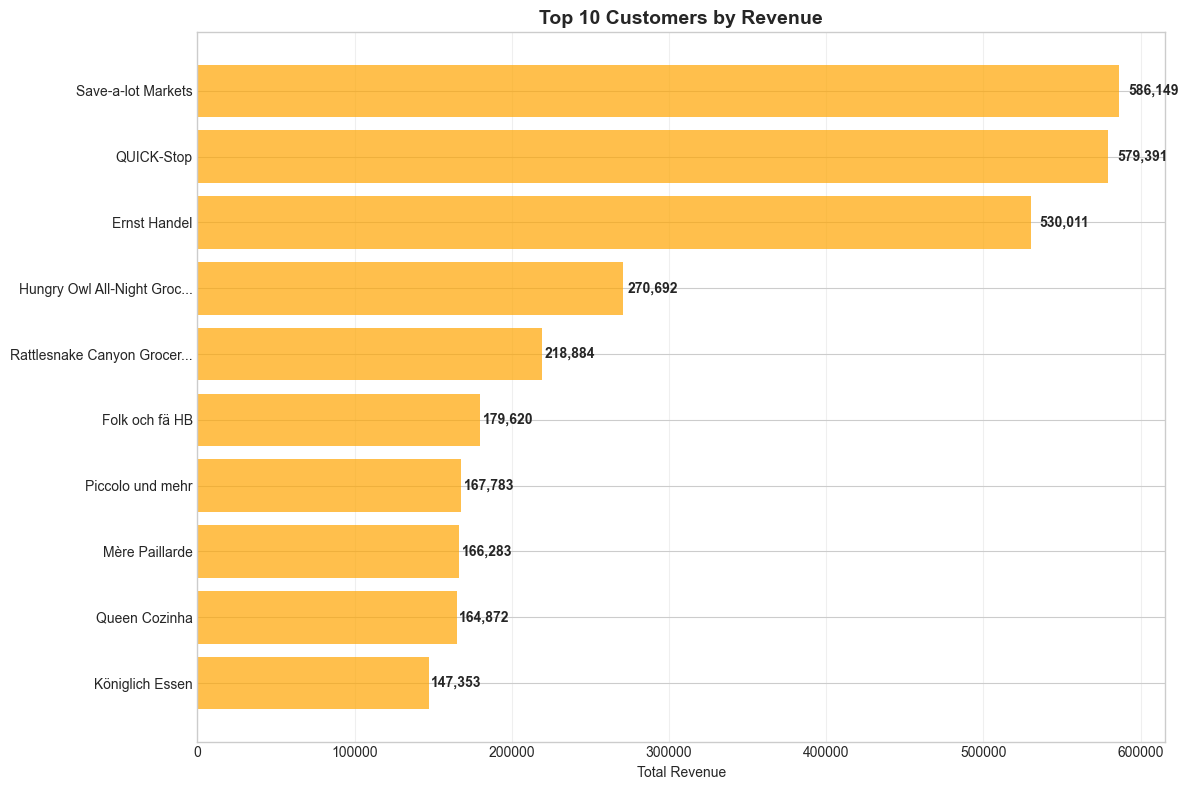

In [21]:
# 4. Top 10 Customers

plt.figure(figsize=(12, 8))
top_10 = customer_summary.nlargest(10, 'total_spent')

# create horizontal bar chart
bars = plt.barh(range(len(top_10)), top_10['total_spent'], color='orange', alpha=0.7)
plt.yticks(range(len(top_10)), [name[:25] + '...' if len(name) > 25 else name
                                for name in top_10['customer_name']])
plt.xlabel('Total Revenue')
plt.title('Top 10 Customers by Revenue', fontweight='bold', fontsize=14)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width * 1.01, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}', ha='left', va='center', fontsize=10, fontweight='bold')
    
plt.gca().invert_yaxis() # highest on top
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [22]:
# The 80/20 Rule (Pareto Analysis)
sorted_customers = customer_summary.sort_values(by='total_spent', ascending=False).copy()


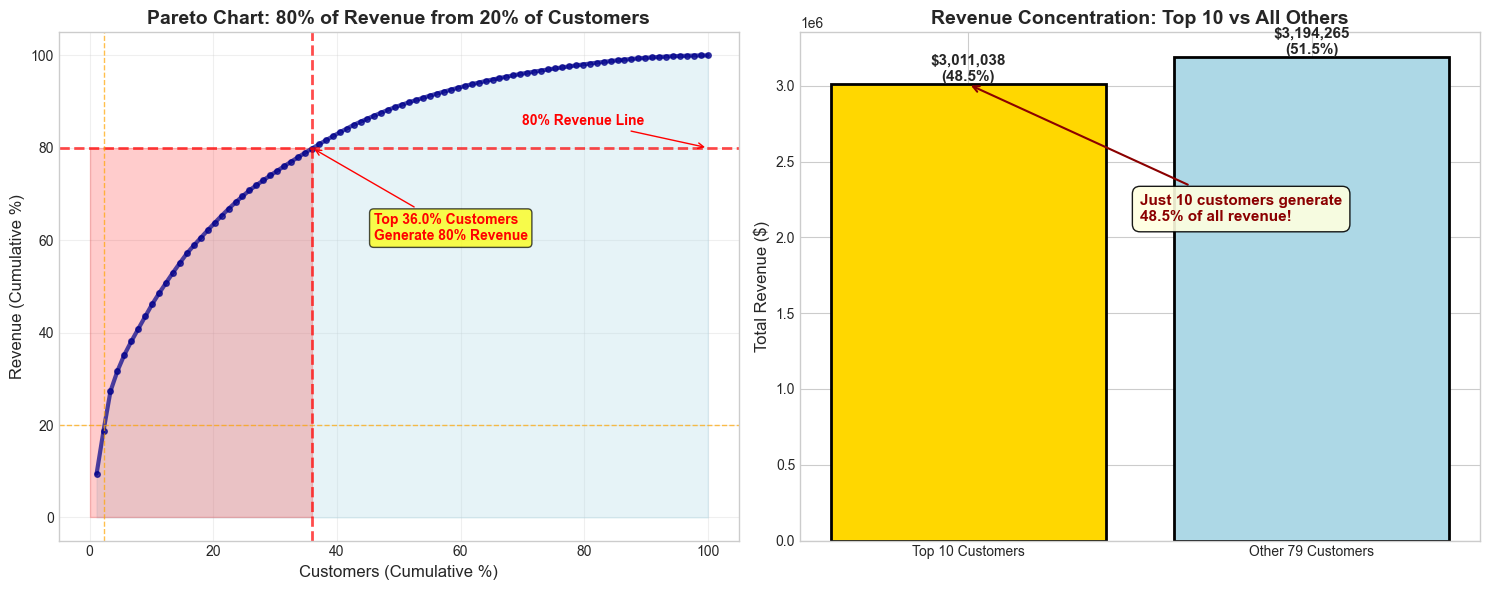

In [23]:
# Calculate cumulative metrics
sorted_customers['cumulative_spent'] = sorted_customers['total_spent'].cumsum()
sorted_customers['cumulative_percent'] = (sorted_customers['cumulative_spent'] / 
                                         sorted_customers['total_spent'].sum() * 100)

sorted_customers['customer_rank'] = range(1, len(sorted_customers) + 1)
sorted_customers['customer_percent'] = (sorted_customers['customer_rank'] / 
                                       len(sorted_customers) * 100)

# Find where 80% of revenue comes from
revenue_80_customers = sorted_customers[sorted_customers['cumulative_percent'] <= 80]
revenue_20_customers = sorted_customers[sorted_customers['cumulative_percent'] <= 20]

# Calculate exact numbers
num_customers_80 = len(revenue_80_customers)
percent_customers_80 = (num_customers_80 / len(sorted_customers) * 100)

num_customers_20 = len(revenue_20_customers)
percent_customers_20 = (num_customers_20 / len(sorted_customers) * 100)

# Find the tipping point
top_10_percent = int(len(sorted_customers) * 0.1)
top_10_revenue = sorted_customers.head(top_10_percent)['total_spent'].sum()
top_10_revenue_share = (top_10_revenue / sorted_customers['total_spent'].sum() * 100)

# Visualize the Pareto Principle
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pareto Curve
ax1.plot(sorted_customers['customer_percent'], sorted_customers['cumulative_percent'], 
        linewidth=3, color='darkblue', marker='o', markersize=4, alpha=0.7)

# Add reference lines
ax1.axhline(80, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax1.axvline(percent_customers_80, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax1.axhline(20, color='orange', linestyle='--', alpha=0.7, linewidth=1)
ax1.axvline(percent_customers_20, color='orange', linestyle='--', alpha=0.7, linewidth=1)

# Fill areas
ax1.fill_between(sorted_customers['customer_percent'], 0, sorted_customers['cumulative_percent'], 
                alpha=0.3, color='lightblue')
ax1.fill_betweenx([0, 80], 0, percent_customers_80, alpha=0.2, color='red')

ax1.set_xlabel('Customers (Cumulative %)', fontsize=12)
ax1.set_ylabel('Revenue (Cumulative %)', fontsize=12)
ax1.set_title('Pareto Chart: 80% of Revenue from 20% of Customers', 
             fontweight='bold', fontsize=14)
ax1.grid(True, alpha=0.3)

# Add annotations
ax1.annotate(f'80% Revenue Line', xy=(100, 80), xytext=(70, 85),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red', fontweight='bold')

ax1.annotate(f'Top {percent_customers_80:.1f}% Customers\nGenerate 80% Revenue', 
            xy=(percent_customers_80, 80), xytext=(percent_customers_80 + 10, 60),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red', fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

# Bar chart: Top 10 customers vs Others
top_10_revenue = sorted_customers.head(10)['total_spent'].sum()
others_revenue = sorted_customers.iloc[10:]['total_spent'].sum()

categories = ['Top 10 Customers', 'Other 79 Customers']
revenues = [top_10_revenue, others_revenue]
colors = ['gold', 'lightblue']

bars = ax2.bar(categories, revenues, color=colors, edgecolor='black', linewidth=2)

ax2.set_ylabel('Total Revenue ($)', fontsize=12)
ax2.set_title('Revenue Concentration: Top 10 vs All Others', 
             fontweight='bold', fontsize=14)

# Add value labels on bars
for bar, revenue in zip(bars, revenues):
    height = bar.get_height()
    percentage = (revenue / (top_10_revenue + others_revenue) * 100)
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'${revenue:,.0f}\n({percentage:.1f}%)', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')
    

# Add annotations explaining impact
top_10_percentage = (top_10_revenue / (top_10_revenue + others_revenue) * 100)
ax2.annotate(f'Just 10 customers generate\n{top_10_percentage:.1f}% of all revenue!',
            xy=(0, top_10_revenue), xytext=(0.5, top_10_revenue * 0.7),
            arrowprops=dict(arrowstyle='->', color='darkred', linewidth=1.5),
            fontsize=11, fontweight='bold', color='darkred',
            bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()


### Machine Learning - Customer Segmentataion

In [24]:

# Calculate some key percentiles
spending_75th = customer_summary['total_spent'].quantile(0.75)  # Top 25%
spending_50th = customer_summary['total_spent'].quantile(0.50)  # Median
spending_25th = customer_summary['total_spent'].quantile(0.25)  # Bottom 25%

orders_75th = customer_summary['order_count'].quantile(0.75)
orders_50th = customer_summary['order_count'].quantile(0.50)
orders_25th = customer_summary['order_count'].quantile(0.25)

# Simple 2D segmentation ( Spending vs Frequency)
def simple_segmentation(row):
    """
     Segment customers based on spending AND frequency
    This creates a 3*3 matrix of customer types
    """
    # Get customer's spending and order count
    spent = row['total_spent']
    orders = row['order_count']
    
    # Determine spending category
    if spent > spending_75th:
        spend_category = 'High'
    elif spent > spending_25th:
        spend_category = 'Medium'
    else:
        spend_category = 'Low'
    
    # Determine frequency category  
    if orders > orders_75th:
        freq_category = 'Frequent'
    elif orders > orders_25th:
        freq_category = 'Regular'
    else:
        freq_category = 'Occasional'
    
    # Combine into a segment
    return f"{spend_category} Spender, {freq_category} Buyer"

# Apply segmentation
customer_summary['segment_simple'] = customer_summary.apply(simple_segmentation, axis=1)
customer_summary[['customer_name', 'total_spent', 'order_count', 'segment_simple']].head()

# Show the distribution of segments
segment_counts = customer_summary['segment_simple'].value_counts()

for segment, count in segment_counts.items():
    percentage = (count / len(customer_summary) * 100)
    print(f"{segment}: {count} customers ({percentage:.2f}%)")



Medium Spender, Regular Buyer: 36 customers (40.45%)
High Spender, Frequent Buyer: 19 customers (21.35%)
Low Spender, Occasional Buyer: 18 customers (20.22%)
Low Spender, Regular Buyer: 5 customers (5.62%)
Medium Spender, Occasional Buyer: 5 customers (5.62%)
Medium Spender, Frequent Buyer: 3 customers (3.37%)
High Spender, Regular Buyer: 3 customers (3.37%)


### Visualize the Simple Segmentation

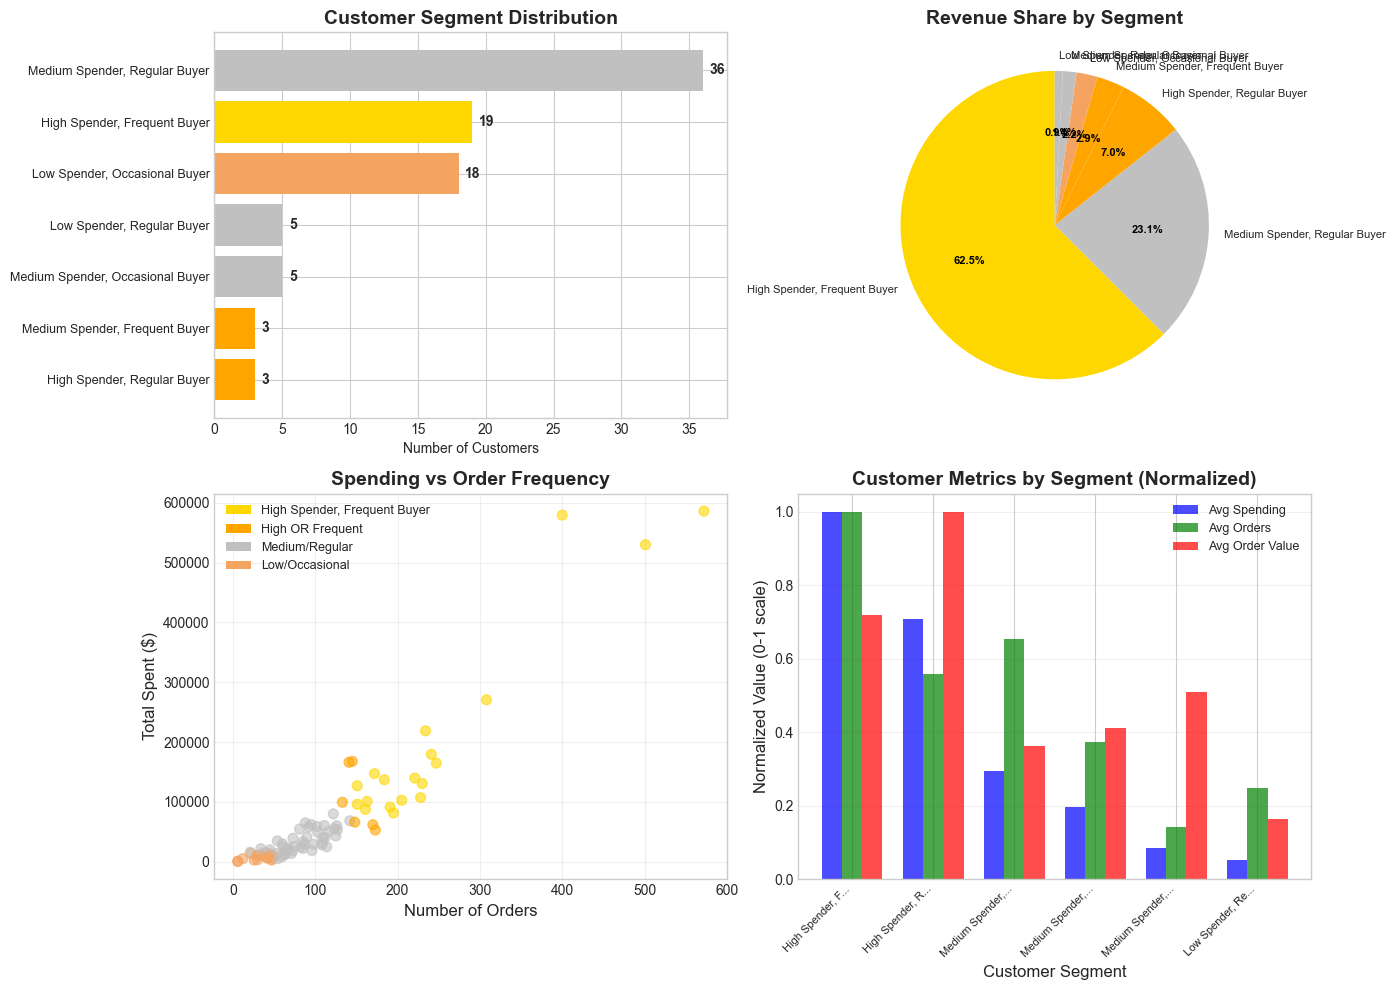

In [25]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Segment Distribution (Bar chart)
segment_counts = customer_summary['segment_simple'].value_counts()

# color map for segments
color_map = {}
for segment in segment_counts.index:
    if 'High' in segment and 'Frequent' in segment:
        color_map[segment] = 'gold'  # Gold for high+frequent
    elif 'High' in segment or 'Frequent' in segment:
        color_map[segment] = 'orange'  # Orange for high OR frequent
    elif 'Medium' in segment or 'Regular' in segment:
        color_map[segment] = 'silver'  # Silver for medium/regular
    else:
        color_map[segment] = 'sandybrown'  # Bronze for low/occasional

colors = [color_map[seg] for seg in segment_counts.index]

# Horizontal bar chart for better readability
bars = axes[0, 0].barh(range(len(segment_counts)), segment_counts.values, color=colors)
axes[0, 0].set_yticks(range(len(segment_counts)))
axes[0, 0].set_yticklabels(segment_counts.index, fontsize=9)
axes[0, 0].set_xlabel('Number of Customers')
axes[0, 0].set_title('Customer Segment Distribution', fontweight='bold', fontsize=14)
axes[0, 0].invert_yaxis()  # Highest count at top

# Add count labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0, 0].text(width + 0.5, bar.get_y() + bar.get_height()/2,
                   f'{width}', ha='left', va='center', fontweight='bold')
    
# 2. Revenue Share by segment
segment_revenue = customer_summary.groupby('segment_simple')['total_spent'].sum()
revenue_colors = [color_map[seg] for seg in segment_revenue.index]

# Sort by revenue (highest first)
segment_revenue = segment_revenue.sort_values(ascending=False)
revenue_colors = [color_map[seg] for seg in segment_revenue.index]

wedges, texts, autotexts = axes[0, 1].pie(segment_revenue.values,
                                         labels=segment_revenue.index,
                                         colors=revenue_colors, autopct='%1.1f%%',
                                         startangle=90, textprops={'fontsize': 8})

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

axes[0, 1].set_title('Revenue Share by Segment', fontweight='bold', fontsize=14)

# 3. Scatter Plot: Spending vs Orders
scatter_colors = []
for segment in customer_summary['segment_simple']:
    if 'High' in segment and 'Frequent' in segment:
        scatter_colors.append('gold')
    elif 'High' in segment or 'Frequent' in segment:
        scatter_colors.append('orange')
    elif 'Medium' in segment or 'Regular' in segment:
        scatter_colors.append('silver')
    else:
        scatter_colors.append('sandybrown')

scatter = axes[1, 0].scatter(customer_summary['order_count'], 
                            customer_summary['total_spent'],
                            c=scatter_colors, alpha=0.6, s=50)

axes[1, 0].set_xlabel('Number of Orders', fontsize=12)
axes[1, 0].set_ylabel('Total Spent ($)', fontsize=12)
axes[1, 0].set_title('Spending vs Order Frequency', fontweight='bold', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# Create custom legend for scatter plot
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='gold', label='High Spender, Frequent Buyer'),
    Patch(facecolor='orange', label='High OR Frequent'),
    Patch(facecolor='silver', label='Medium/Regular'),
    Patch(facecolor='sandybrown', label='Low/Occasional')
]
axes[1, 0].legend(handles=legend_elements, loc='upper left', fontsize=9)

# 4. Average Metrics by Segment

segment_metrics = customer_summary.groupby('segment_simple').agg({
    'total_spent': 'mean',
    'order_count': 'mean',
    'avg_order_value': 'mean'
}).sort_values('total_spent', ascending=False)

# Top 6 segments for readability (or all if less than 6)
top_segments = segment_metrics.head(6).index

# Prepare data for grouped bar chart
metrics_data = segment_metrics.loc[top_segments]
x = np.arange(len(top_segments))
width = 0.25

# Normalize metrics for comparison
metrics_to_plot = ['total_spent', 'order_count', 'avg_order_value']
metric_labels = ['Avg Spending', 'Avg Orders', 'Avg Order Value']
metric_colors = ['blue', 'green', 'red']

for i, (metric, label, color) in enumerate(zip(metrics_to_plot, metric_labels, metric_colors)):
    values = metrics_data[metric].values
    # Normalize to 0-1 scale
    values_norm = values / values.max()
    axes[1, 1].bar(x + i*width, values_norm, width, label=label, color=color, alpha=0.7)

axes[1, 1].set_xlabel('Customer Segment', fontsize=12)
axes[1, 1].set_ylabel('Normalized Value (0-1 scale)', fontsize=12)
axes[1, 1].set_title('Customer Metrics by Segment (Normalized)', fontweight='bold', fontsize=14)
axes[1, 1].set_xticks(x + width)
axes[1, 1].set_xticklabels([s[:15] + '...' if len(s) > 15 else s for s in top_segments], 
                          rotation=45, ha='right', fontsize=8)
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

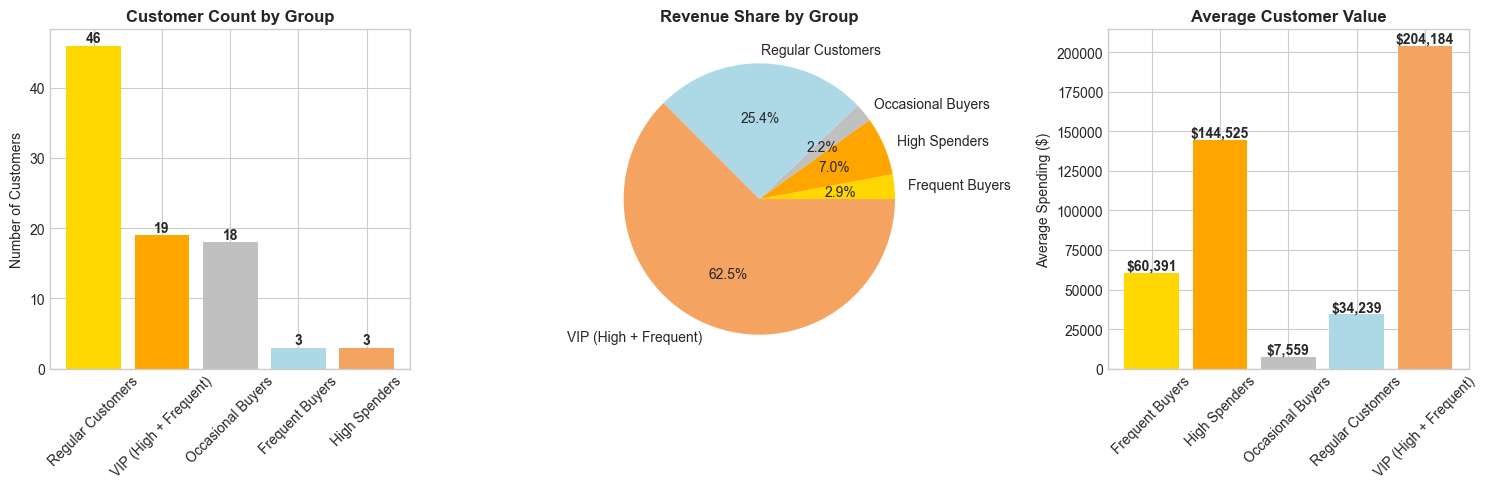


Occasional Buyers:
  • 18 customers (20.2% of total)
  • $136,059 revenue (2.2% of total)
  • Avg value: $7,559
  • Avg orders: 33.4

Regular Customers:
  • 46 customers (51.7% of total)
  • $1,574,996 revenue (25.4% of total)
  • Avg value: $34,239
  • Avg orders: 84.0

VIP (High + Frequent):
  • 19 customers (21.3% of total)
  • $3,879,501 revenue (62.5% of total)
  • Avg value: $204,184
  • Avg orders: 250.3

Frequent Buyers:
  • 3 customers (3.4% of total)
  • $181,173 revenue (2.9% of total)
  • Avg value: $60,391
  • Avg orders: 163.7

High Spenders:
  • 3 customers (3.4% of total)
  • $433,574 revenue (7.0% of total)
  • Avg value: $144,525
  • Avg orders: 139.7


In [26]:
# Group segments into broader categories for simpler analysis
def simplify_segment(segment):
    """Group detailed segments into broader categories"""
    if 'High Spender' in segment and 'Frequent Buyer' in segment:
        return 'VIP (High + Frequent)'
    elif 'High Spender' in segment:
        return 'High Spenders'
    elif 'Frequent Buyer' in segment:
        return 'Frequent Buyers'
    elif 'Medium Spender' in segment or 'Regular Buyer' in segment:
        return 'Regular Customers'
    else:
        return 'Occasional Buyers'

customer_summary['segment_simple_group'] = customer_summary['segment_simple'].apply(simplify_segment)

# Create simple visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Customer Count by Group
group_counts = customer_summary['segment_simple_group'].value_counts()
colors = ['gold', 'orange', 'silver', 'lightblue', 'sandybrown']
axes[0].bar(group_counts.index, group_counts.values, color=colors[:len(group_counts)])
axes[0].set_title('Customer Count by Group', fontweight='bold')
axes[0].set_ylabel('Number of Customers')
axes[0].tick_params(axis='x', rotation=45)

# Add count labels
for i, count in enumerate(group_counts.values):
    axes[0].text(i, count + 0.5, str(count), ha='center', fontweight='bold')

# Plot 2: Revenue Share by Group
group_revenue = customer_summary.groupby('segment_simple_group')['total_spent'].sum()
axes[1].pie(group_revenue.values, labels=group_revenue.index, autopct='%1.1f%%',
           colors=colors[:len(group_revenue)])
axes[1].set_title('Revenue Share by Group', fontweight='bold')

# Plot 3: Average Customer Value
group_avg_value = customer_summary.groupby('segment_simple_group')['total_spent'].mean()
bars = axes[2].bar(group_avg_value.index, group_avg_value.values, 
                  color=colors[:len(group_avg_value)])
axes[2].set_title('Average Customer Value', fontweight='bold')
axes[2].set_ylabel('Average Spending ($)')
axes[2].tick_params(axis='x', rotation=45)

# Add value labels
for bar, value in zip(bars, group_avg_value.values):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'${value:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# Calculating insights
total_customers = len(customer_summary)
total_revenue = customer_summary['total_spent'].sum()

for group in customer_summary['segment_simple_group'].unique():
    group_data = customer_summary[customer_summary['segment_simple_group'] == group]
    group_size = len(group_data)
    group_revenue = group_data['total_spent'].sum()
    revenue_share = (group_revenue / total_revenue * 100)
    
    print(f"\n{group}:")
    print(f"  • {group_size} customers ({group_size/total_customers*100:.1f}% of total)")
    print(f"  • ${group_revenue:,.0f} revenue ({revenue_share:.1f}% of total)")
    print(f"  • Avg value: ${group_data['total_spent'].mean():,.0f}")
    print(f"  • Avg orders: {group_data['order_count'].mean():.1f}")

Machine Learning

In [27]:
# Dataset copy for ML
ml_data = customer_summary.copy()

In [28]:
ml_data.head()

,customer_name,total_spent,avg_order_value,order_count,total_items,avg_discount,unique_products,first_order,last_order,segment_simple,segment_simple_group
0,Alfreds Futterkiste,14064.500,351.612500,40,623,0.111250,11,1997-08-25,1998-04-09,"Low Spender, Occasional Buyer",Occasional Buyers
1,Ana Trujillo Emparedados y helados,5630.200,117.295833,48,259,0.000000,10,1996-09-18,1998-03-04,"Low Spender, Occasional Buyer",Occasional Buyers
2,Antonio Moreno Taquería,41514.705,461.274500,90,1958,0.053333,15,1996-11-27,1998-01-28,"Medium Spender, Regular Buyer",Regular Customers
3,Around the Horn,60560.250,545.587838,111,2568,0.020270,24,1996-11-15,1998-04-10,"Medium Spender, Regular Buyer",Regular Customers
4,B's Beverages,28299.900,262.036111,108,1489,0.000000,19,1996-08-26,1998-04-14,"Medium Spender, Regular Buyer",Regular Customers


In [29]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_name         89 non-null     object 
 1   total_spent           89 non-null     float64
 2   avg_order_value       89 non-null     float64
 3   order_count           89 non-null     int64  
 4   total_items           89 non-null     int64  
 5   avg_discount          89 non-null     float64
 6   unique_products       89 non-null     int64  
 7   first_order           89 non-null     object 
 8   last_order            89 non-null     object 
 9   segment_simple        89 non-null     object 
 10  segment_simple_group  89 non-null     object 
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ KB


In [30]:
# Data preparation for ML
# Convert date columns
ml_data['first_order'] = pd.to_datetime(ml_data['first_order'])
ml_data['last_order'] = pd.to_datetime(ml_data['last_order'])

# Time-based features
ml_data['customer_lifetime_days'] = (ml_data['last_order'] - ml_data['first_order']).dt.days
ml_data['order_frequency'] = ml_data['order_count'] / ml_data['customer_lifetime_days'].clip(lower=1)
ml_data['avg_days_between_orders'] = ml_data['customer_lifetime_days'] / ml_data['order_count'].clip(lower=1)

# Monetary features
ml_data['spending_per_day'] = ml_data['total_spent'] / ml_data['customer_lifetime_days'].clip(lower=1)
ml_data['items_per_order'] = ml_data['total_items'] / ml_data['order_count'].clip(lower=1)

# Recency (days since last order)
reference_date = ml_data['last_order'].max() + pd.Timedelta(days=1)
ml_data['recency_days'] = (reference_date - ml_data['last_order']).dt.days

# RFM-like scores
ml_data['recency_score'] = pd.qcut(ml_data['recency_days'], q=4, labels=[4, 3, 2, 1]).astype(int)
ml_data['frequency_score'] = pd.qcut(ml_data['order_count'], q=4, labels=[1, 2, 3, 4]).astype(int)
ml_data['monetary_score'] = pd.qcut(ml_data['total_spent'], q=4, labels=[1, 2, 3, 4]).astype(int)
ml_data['rfm_score'] = ml_data['recency_score'] * 100 + ml_data['frequency_score'] * 10 + ml_data['monetary_score']

# Business metrics
ml_data['basket_size'] = ml_data['total_spent'] / ml_data['total_items'].clip(lower=1)
ml_data['discount_impact'] = ml_data['avg_discount'] * ml_data['total_spent']

print(f"\n Dataset shape after feature engineering: {ml_data.shape}")
print(f"Total features: {len(ml_data.columns)}")

# Display new features
new_features = [col for col in ml_data.columns if col not in customer_summary.columns]
print(f"\n Engineered {len(new_features)} new features:")
for i, feat in enumerate(new_features, 1):
    print(f"  {i:2d}. {feat}")


 Dataset shape after feature engineering: (89, 23)
Total features: 23

 Engineered 12 new features:
   1. customer_lifetime_days
   2. order_frequency
   3. avg_days_between_orders
   4. spending_per_day
   5. items_per_order
   6. recency_days
   7. recency_score
   8. frequency_score
   9. monetary_score
  10. rfm_score
  11. basket_size
  12. discount_impact


In [31]:
# northwind_sklearn_only.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [32]:
print(f"Data Shape: {ml_data.shape}")

# Select only numeric features for ML
numeric_features = [
    'total_spent', 'avg_order_value', 'order_count', 'total_items',
    'avg_discount', 'unique_products', 'customer_lifetime_days',
    'order_frequency', 'avg_days_between_orders', 'spending_per_day',
    'items_per_order', 'recency_days', 'recency_score', 'frequency_score',
    'monetary_score', 'rfm_score', 'basket_size', 'discount_impact'
]
print(f"Using {len(numeric_features)} numeric features")

# Features (X) and target (y)
X = ml_data[numeric_features].values
y = ml_data['segment_simple_group']

print(f"\n TARGET: segment_simple_group")
print(f"Unique segments: {list(y.unique())}")

# Show segment distribution
print(f"\n SEGMENT DISTRIBUTION:")
segment_counts = y.value_counts()
for segment, count in segment_counts.items():
    percentage = count / len(y) * 100
    print(f"  {segment}: {count} customers ({percentage:.1f}%)")

Data Shape: (89, 23)
Using 18 numeric features

 TARGET: segment_simple_group
Unique segments: ['Occasional Buyers', 'Regular Customers', 'VIP (High + Frequent)', 'Frequent Buyers', 'High Spenders']

 SEGMENT DISTRIBUTION:
  Regular Customers: 46 customers (51.7%)
  VIP (High + Frequent): 19 customers (21.3%)
  Occasional Buyers: 18 customers (20.2%)
  Frequent Buyers: 3 customers (3.4%)
  High Spenders: 3 customers (3.4%)


In [33]:
# Encode Target & Split Data
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

for i, class_name in enumerate(label_encoder.classes_):
    count = sum(y_encoded == i)
    print(f"  {class_name} → {i} ({count} customers)")

# Get all unique classes in the data
all_classes = label_encoder.classes_

# Split data - use larger test size to ensure all classes appear
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.25,  # Increased from 0.2 to 0.25
    random_state=42,
    stratify=y_encoded
)

print(f"  Total customers: {len(X)}")
print(f"  Training set: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Test set: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")


# Check which classes are in test set
test_classes = np.unique(label_encoder.inverse_transform(y_test))
print(f"\n CLASSES IN TEST SET: {len(test_classes)} out of {len(all_classes)}")
for cls in all_classes:
    in_test = cls in test_classes
    status = "✓" if in_test else "✗"
    print(f"  {status} {cls}")

  Frequent Buyers → 0 (3 customers)
  High Spenders → 1 (3 customers)
  Occasional Buyers → 2 (18 customers)
  Regular Customers → 3 (46 customers)
  VIP (High + Frequent) → 4 (19 customers)
  Total customers: 89
  Training set: 66 (74.2%)
  Test set: 23 (25.8%)

 CLASSES IN TEST SET: 5 out of 5
  ✓ Frequent Buyers
  ✓ High Spenders
  ✓ Occasional Buyers
  ✓ Regular Customers
  ✓ VIP (High + Frequent)


In [34]:
# Scaling Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [35]:
# Evaluate Model
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy:.2%}")

# Get classes that are actually in y_test
present_classes = np.unique(y_test)
present_class_names = label_encoder.inverse_transform(present_classes)

print(classification_report(
    y_test, 
    y_pred, 
    target_names=present_class_names,
    zero_division=0
))



 Accuracy: 95.65%
                       precision    recall  f1-score   support

      Frequent Buyers       1.00      1.00      1.00         1
        High Spenders       0.00      0.00      0.00         1
    Occasional Buyers       1.00      1.00      1.00         4
    Regular Customers       0.92      1.00      0.96        12
VIP (High + Frequent)       1.00      1.00      1.00         5

             accuracy                           0.96        23
            macro avg       0.78      0.80      0.79        23
         weighted avg       0.92      0.96      0.94        23



In [36]:
# Feature Importance
# Get feature importance
importance = pd.DataFrame({
    'feature': numeric_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n TOP 10 MOST IMPORTANT FEATURES:")
for i, row in importance.head(10).iterrows():
    print(f"  {i+1:2d}. {row['feature']:25s}: {row['importance']:.3f}")




 TOP 10 MOST IMPORTANT FEATURES:
   1. total_spent              : 0.153
   3. order_count              : 0.150
   4. total_items              : 0.123
  15. monetary_score           : 0.097
  14. frequency_score          : 0.089
   6. unique_products          : 0.077
  10. spending_per_day         : 0.067
   2. avg_order_value          : 0.053
   9. avg_days_between_orders  : 0.034
  18. discount_impact          : 0.033


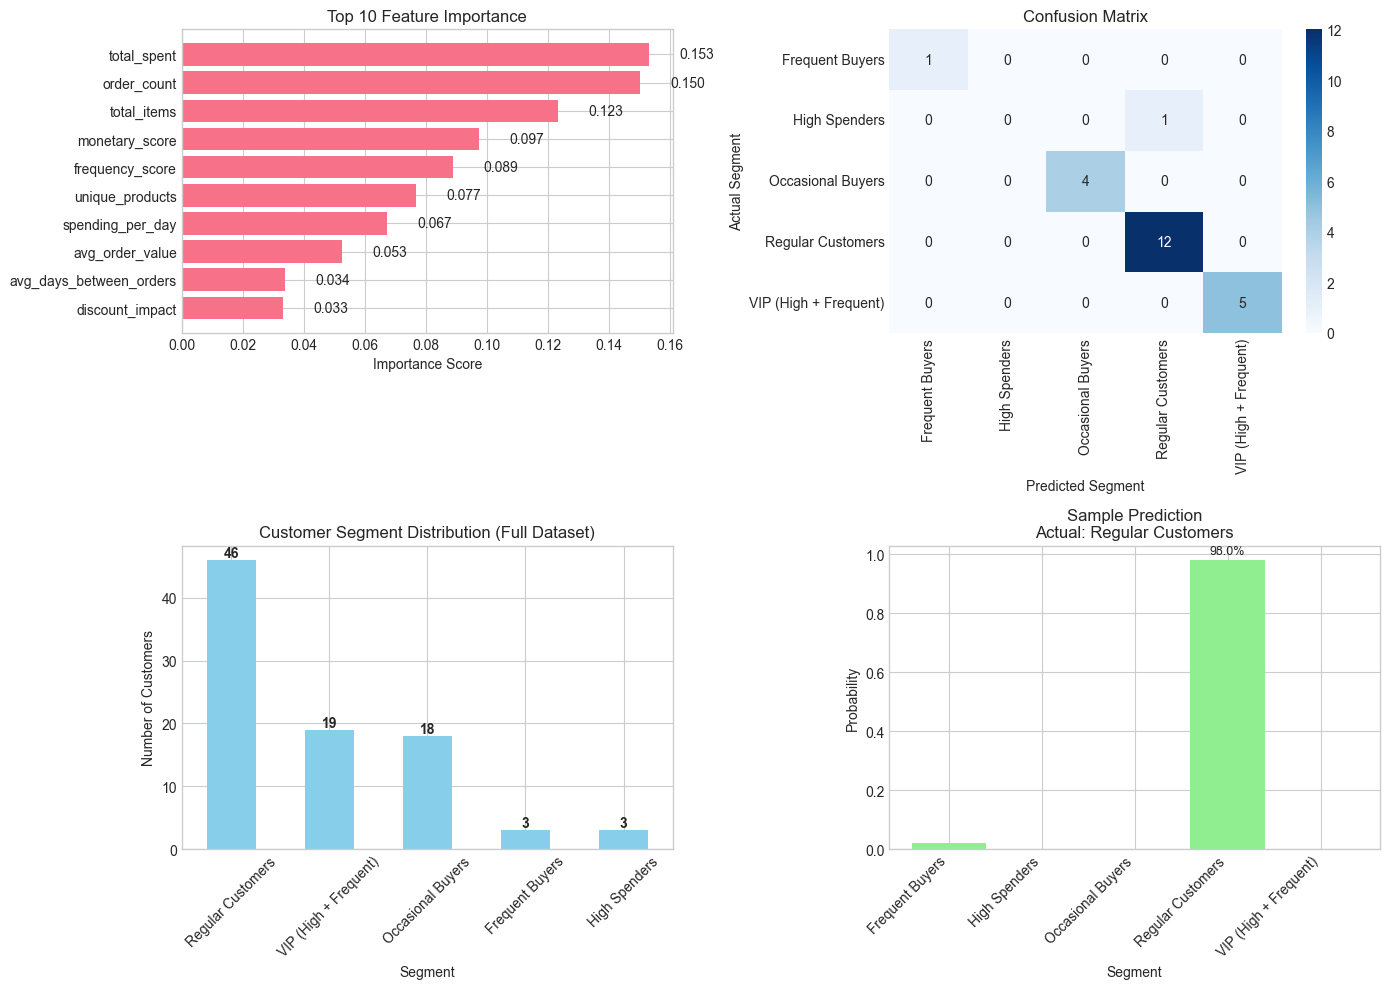

In [37]:
# Final Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Feature Importance
top_features = importance.head(10)
bars = axes[0, 0].barh(range(len(top_features)), top_features['importance'])
axes[0, 0].set_yticks(range(len(top_features)))
axes[0, 0].set_yticklabels(top_features['feature'])
axes[0, 0].set_xlabel('Importance Score')
axes[0, 0].set_title('Top 10 Feature Importance')
axes[0, 0].invert_yaxis()

# Add importance values
for i, (bar, row) in enumerate(zip(bars, top_features.itertuples())):
    axes[0, 0].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                   f'{row.importance:.3f}', va='center')

# 2. Confusion Matrix (only for present classes)
axes[0, 1].set_title('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=present_class_names,
            yticklabels=present_class_names,
            ax=axes[0, 1])
axes[0, 1].set_xlabel('Predicted Segment')
axes[0, 1].set_ylabel('Actual Segment')

# 3. Segment Distribution (full dataset)
segment_counts.plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Customer Segment Distribution (Full Dataset)')
axes[1, 0].set_xlabel('Segment')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].tick_params(axis='x', rotation=45)

# Add count labels
for i, count in enumerate(segment_counts.values):
    axes[1, 0].text(i, count + 0.5, str(count), ha='center', fontweight='bold')

# 4. Sample Prediction
sample_idx = 0
sample_probs = y_pred_proba[sample_idx]
bars = axes[1, 1].bar(range(len(sample_probs)), sample_probs, color='lightgreen')
axes[1, 1].set_title(f'Sample Prediction\nActual: {label_encoder.inverse_transform([y_test[sample_idx]])[0]}')
axes[1, 1].set_xlabel('Segment')
axes[1, 1].set_ylabel('Probability')
axes[1, 1].set_xticks(range(len(sample_probs)))
axes[1, 1].set_xticklabels(label_encoder.classes_, rotation=45, ha='right')

# Add probability labels
for bar, prob in zip(bars, sample_probs):
    height = bar.get_height()
    if height > 0.05:
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{prob:.1%}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
# plt.savefig('reports/northwind_ml_results.png', dpi=150, bbox_inches='tight')
plt.show()

In [38]:
os.makedirs('models', exist_ok=True)
os.makedirs('reports', exist_ok=True)

# Save model
joblib.dump(model, 'models/northwind_model.pkl')
print(f" Model saved: models/northwind_model.pkl")

# Save preprocessing
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(label_encoder, 'models/label_encoder.pkl')
print(f" Scaler saved: models/scaler.pkl")
print(f" Label encoder saved: models/label_encoder.pkl")

# Save metadata about the model
metadata = {
    'dataset_info': {
        'n_customers': len(ml_data),
        'n_features': len(numeric_features),
        'target_classes': list(label_encoder.classes_),
        'class_distribution': segment_counts.to_dict()
    },
    'model_info': {
        'model_type': 'RandomForestClassifier',
        'accuracy': float(accuracy),
        'n_estimators': 100,
        'max_depth': 10,
        'classes_in_training': list(label_encoder.classes_),
        'classes_in_test': list(present_class_names)
    }
}

import json
with open('models/model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)
print(f" Model metadata saved: models/model_metadata.json")

 Model saved: models/northwind_model.pkl
 Scaler saved: models/scaler.pkl
 Label encoder saved: models/label_encoder.pkl
 Model metadata saved: models/model_metadata.json


In [39]:
# Prediction Function
def predict_customer_segment(customer_features):
    """
    Predict customer segment from features dictionary
    """
    try:
        # Load artifacts
        model = joblib.load('models/northwind_model.pkl')
        scaler = joblib.load('models/scaler.pkl')
        label_encoder = joblib.load('models/label_encoder.pkl')
        
        # Prepare features in correct order
        features_list = []
        for feature_name in numeric_features:
            if feature_name in customer_features:
                features_list.append(customer_features[feature_name])
            else:
                features_list.append(0)
        
        # Scale features
        features_array = np.array(features_list).reshape(1, -1)
        features_scaled = scaler.transform(features_array)
        
        # Predict
        probabilities = model.predict_proba(features_scaled)[0]
        predicted_class = np.argmax(probabilities)
        predicted_segment = label_encoder.inverse_transform([predicted_class])[0]

        # Prepare results
        results = {
            'segment': predicted_segment,
            'confidence': float(probabilities[predicted_class]),
            'success': True,
            'all_probabilities': {
                label_encoder.inverse_transform([i])[0]: float(prob)
                for i, prob in enumerate(probabilities)
            },
            'top_features': importance.head(5)[['feature', 'importance']].to_dict('records')
        }
        
        return results
        
    except Exception as e:
        return {
            'success': False,
            'error': str(e),
            'segment': 'Unknown',
            'confidence': 0.0
        }

In [40]:
# Demonstration of Prediction Function
# A sample customer feature set
sample_idx = 0
sample_customer = {}
for i, feature_name in enumerate(numeric_features):
    sample_customer[feature_name] = X_test[sample_idx, i]

print(f"\n SAMPLE CUSTOMER FEATURES:")
print(f"  • total_spent: ${sample_customer.get('total_spent', 0):,.0f}")
print(f"  • order_count: {sample_customer.get('order_count', 0)}")
print(f"  • recency_days: {sample_customer.get('recency_days', 0)} days")

# Make prediction
prediction = predict_customer_segment(sample_customer)

if prediction['success']:
    actual_segment = label_encoder.inverse_transform([y_test[sample_idx]])[0]
    
    print(f"\n PREDICTION RESULTS:")
    print(f"  Actual Segment:    {actual_segment}")
    print(f"  Predicted Segment: {prediction['segment']}")
    print(f"  Confidence:        {prediction['confidence']:.1%}")
    
    if actual_segment == prediction['segment']:
        print(f"   CORRECT PREDICTION!")
    else:
        print(f"   MISCLASSIFIED")
    
    print(f"\n  ALL PROBABILITIES:")
    sorted_probs = sorted(prediction['all_probabilities'].items(),
                         key=lambda x: x[1], reverse=True)
    for segment, prob in sorted_probs:
        marker = "✓" if segment == actual_segment else " "
        print(f"    {marker} {segment:25s}: {prob:.1%}")
else:
    print(f" Prediction failed: {prediction['error']}")


 SAMPLE CUSTOMER FEATURES:
  • total_spent: $60,560
  • order_count: 111.0
  • recency_days: 27.0 days

 PREDICTION RESULTS:
  Actual Segment:    Regular Customers
  Predicted Segment: Regular Customers
  Confidence:        98.0%
   CORRECT PREDICTION!

  ALL PROBABILITIES:
    ✓ Regular Customers        : 98.0%
      Frequent Buyers          : 2.0%
      High Spenders            : 0.0%
      Occasional Buyers        : 0.0%
      VIP (High + Frequent)    : 0.0%


In [41]:
# Final Summary
print(f"\n North_Wind PROJECT SUMMARY:")
print(f"  Customers analyzed: {len(ml_data)}")
print(f"  ML features used: {len(numeric_features)}")
print(f"  Customer segments: {len(label_encoder.classes_)}")
print(f"  Model accuracy: {accuracy:.1%}")

print(f"\n OUTPUT FILES:")
print(f"  • Model: models/northwind_model.pkl")
print(f"  • Visualizations: reports/northwind_ml_results.png")
print(f"  • Metadata: models/model_metadata.json")

print(f"\n USE THE MODEL:")
print("  result = predict_customer_segment({")
print("      'total_spent': 10000,")
print("      'order_count': 15,")
print("      'recency_days': 30,")
print("      ...")

print(f"\n Ready to predict customer segments for your North Wind business!")


 North_Wind PROJECT SUMMARY:
  Customers analyzed: 89
  ML features used: 18
  Customer segments: 5
  Model accuracy: 95.7%

 OUTPUT FILES:
  • Model: models/northwind_model.pkl
  • Visualizations: reports/northwind_ml_results.png
  • Metadata: models/model_metadata.json

 USE THE MODEL:
  result = predict_customer_segment({
      'total_spent': 10000,
      'order_count': 15,
      'recency_days': 30,
      ...

 Ready to predict customer segments for your North Wind business!
